# Cleaning, Analysis, Visualization (Python)

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Checking Datasets

In [3]:
def missing(df):
  missing = df.isna().any().any()
  if missing:
    print(f'Missing values detected:{missing}')
  else:
    print('No missing values')

def duplicate(df):
  duplicate = df.duplicated().any().any()
  if duplicate:
    print('Duplicate values present')
  else:
    print('No duplicate values')

## Games Dataset

In [4]:
g = pd.read_csv('Games.csv')

missing(g)
duplicate(g)
g = g.drop('game_id', axis=1)
g['price'] = g['price'].str.replace('$','').astype(float).round(2)

g.loc[g['product_id'] == 3, 'console'] = 'Atari 2600'
g.loc[g['product_id'] == 4, 'console'] = 'NES'
g.loc[g['product_id'] == 5, 'console'] = 'Atari 2600'
g.loc[g['product_id'] == 21, 'console'] = 'Super Nintendo'
g.loc[g['product_id'] == 105, 'console'] = 'Super Nintendo'
g.loc[g['product_id'] == 117, 'console'] = 'Super Nintendo'

print(g)
g.to_csv('games_clean.csv', index=False)

No missing values
No duplicate values


<ipython-input-4-70d7d0ad7888>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  g['price'] = g['price'].str.replace('$','').astype(float).round(2)


     product_id                        name         console      brand  \
0             1           Super Mario Bros.             NES   Nintendo   
1             2         The Legend of Zelda             NES   Nintendo   
2             3                     Pac-Man      Atari 2600      Namco   
3             4                 Donkey Kong             NES   Nintendo   
4             5              Space Invaders      Atari 2600      Taito   
..          ...                         ...             ...        ...   
121         122            Earthworm Jim 3D     Nintendo 64  Interplay   
122         123      Super Ghouls 'n Ghosts  Super Nintendo     Capcom   
123         124        Super Castlevania IV  Super Nintendo     Konami   
124         125  NBA Jam Tournament Edition  Super Nintendo     Midway   
125         126      Star Wars: Dark Forces              PC  LucasArts   

                    genre  price  quantity  
0              Platformer   20.0         9  
1        Action-Adven

## Consoles Dataset

In [5]:
c = pd.read_csv ('Consoles.csv')

missing(c)
duplicate(c)
c = c.drop('console_id', axis=1)
c = c.drop('color', axis=1)
c['price'] = c['price'].str.replace('$','').astype(float).round(2)

print(c)
c.to_csv('consoles_clean.csv', index=False)

No missing values
No duplicate values


<ipython-input-5-7bfea588d595>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  c['price'] = c['price'].str.replace('$','').astype(float).round(2)


    product_id                                        name             brand  \
0          127                                         NES          Nintendo   
1          128  Super Nintendo Entertainment System (SNES)          Nintendo   
2          129                                Sega Genesis              Sega   
3          130                                    Game Boy          Nintendo   
4          131                                 PlayStation              Sony   
5          132                                 Nintendo 64          Nintendo   
6          133                              Sega Dreamcast              Sega   
7          134                              Game Boy Color          Nintendo   
8          135                               PlayStation 2              Sony   
9          136                                        Xbox         Microsoft   
10         137                                    GameCube          Nintendo   
11         138                          

## Accessories Dataset

In [6]:
a = pd.read_csv('Accessories.csv')

missing(a)
duplicate(a)
a = a.drop('acc_id', axis=1)
a['price'] = a['price'].str.replace('$','').astype(float).round(2)

print(a)
a.to_csv('accessories_clean.csv', index=False)

No missing values
No duplicate values


<ipython-input-6-0a47f51d6b75>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  a['price'] = a['price'].str.replace('$','').astype(float).round(2)


    product_id                                          name  \
0          175          Xbox 360 Wireless Controller (Black)   
1          176   PlayStation 4 DualShock 4 Controller (Blue)   
2          177         Nintendo Switch Pro Controller (Gray)   
3          178                  Xbox One Play and Charge Kit   
4          179               PlayStation 2 Memory Card (8MB)   
..         ...                                           ...   
71         246                       Sega Genesis Game Genie   
72         247                 Game Boy Printer Paper Refill   
73         248                        PlayStation 2 Multitap   
74         249              Nintendo Switch Labo Variety Kit   
75         250  Xbox Wireless Controller Adapter for Windows   

                               console  price  quantity  
0                             Xbox 360   40.0        10  
1                        PlayStation 4   50.0         9  
2                      Nintendo Switch   60.0         8  

## Adding Category Column in Products Dataset
I had to load all of the products, games, consoles, and accessories datasets to do this portion.

In [7]:
p = pd.read_csv('Products.csv')

missing(p)
duplicate(p)

p = pd.concat([g, c, a], ignore_index=True)
price = p[['product_id', 'price']]

p = p.drop('console', axis=1)
p = p.drop('brand', axis=1)
p = p.drop('genre', axis=1)

p['category'] = ''
p.loc[p['product_id'].isin(g['product_id']), 'category'] = 'Game'
p.loc[p['product_id'].isin(c['product_id']), 'category'] = 'Console'
p.loc[p['product_id'].isin(a['product_id']), 'category'] = 'Accessories'
p.drop(p.index[251:], inplace=True)

print(p)
p.to_csv('products_clean.csv', index=False)

No missing values
No duplicate values
     product_id                                          name  price  \
0             1                             Super Mario Bros.   20.0   
1             2                           The Legend of Zelda   25.0   
2             3                                       Pac-Man   15.0   
3             4                                   Donkey Kong   18.0   
4             5                                Space Invaders   12.0   
..          ...                                           ...    ...   
245         246                       Sega Genesis Game Genie   30.0   
246         247                 Game Boy Printer Paper Refill    5.0   
247         248                        PlayStation 2 Multitap   30.0   
248         249              Nintendo Switch Labo Variety Kit   70.0   
249         250  Xbox Wireless Controller Adapter for Windows   25.0   

     quantity     category  
0           9         Game  
1           7         Game  
2         

## Customers Dataset

In [8]:
customers = pd.read_csv('Customers.csv')

missing(customers)
duplicate(customers)
customers['full_name'] = customers['first_name'].str.cat(customers['last_name'], sep=' ')
customers = customers.drop('first_name', axis=1)
customers = customers.drop('last_name', axis=1)
customers = customers.drop('phone_number', axis=1)
customers = customers.drop('email', axis=1)

print(customers)
customers.to_csv('customers_clean.csv', index=False)

No missing values
No duplicate values
     customer_id           full_name
0              1       Zelenia Parks
1              2        Raphael Kirk
2              3      Kyla Contreras
3              4  Jacqueline Dillard
4              5      Noelle Farrell
..           ...                 ...
859          860        Darius Byers
860          861       Armand Potter
861          862         Dexter Peck
862          863       Travis Baxter
863          864           Lael Diaz

[864 rows x 2 columns]


## Transactions Dataset

In [9]:
t = pd.read_csv('Transactions.csv')

missing(t)
duplicate(t)
t['date'] = pd.to_datetime(t['date'])
t['month'] = t['date'].dt.strftime('%B')
print(t)
t.to_csv('transactions_clean.csv', index=False)

# added month to make monthly revenue easy to calculate 

No missing values
No duplicate values
      trans_id  customer_id  product_id       date  payment_method     month
0            1          850         136 2023-06-14            cash      June
1            2          652         184 2023-03-30  mobile payment     March
2            3           20         196 2023-03-01            cash     March
3            4          443          58 2023-06-17  mobile payment      June
4            5          759         210 2023-01-30          credit   January
...        ...          ...         ...        ...             ...       ...
1495      1496          471          89 2023-02-12            cash  February
1496      1497          213         232 2023-06-25            cash      June
1497      1498          101          47 2023-06-03           debit      June
1498      1499          691          75 2023-06-17            cash      June
1499      1500          659         145 2023-04-14  mobile payment     April

[1500 rows x 6 columns]


# Visualizations

## 1. Find the total revenue of each month.

In [10]:
#joining transactions and products
join_t_p = pd.merge(t, p, on='product_id', how='left')
join_t_p = join_t_p.drop('quantity', axis=1)
monthly_revenue = join_t_p.groupby('month')['price'].sum()

#dataframe
custom_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=custom_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')
print(monthly_revenue)

      month    price
2   January  17491.0
1  February  14969.0
4     March  13728.0
0     April  15670.0
5       May  19515.0
3      June  16264.0


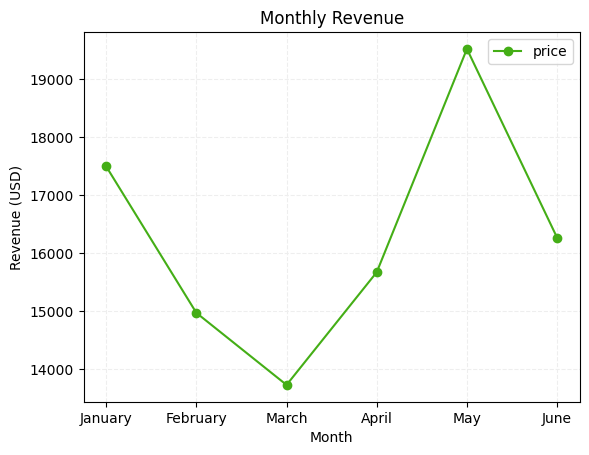

In [11]:
#graph
monthly_revenue.plot(x='month', y='price', kind='line', color='#44ae16', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel("Revenue (USD)")
plt.title('Monthly Revenue')

plt.grid(color='#eeeeee', linestyle='--')
plt.show()

## 2. Find the total revenue and units sold for each category (games, consoles, accessories).

In [12]:
#dataframes
categories_revenue = join_t_p.groupby('category')['price'].sum()
categories_revenue = categories_revenue.sort_values(ascending=False)
categories_units = join_t_p.groupby('category')['trans_id'].count()
categories_units = categories_units.sort_values(ascending=False)

print(categories_revenue)
print(categories_units)

category
Console        56830.0
Game           22742.0
Accessories    18065.0
Name: price, dtype: float64
category
Game           756
Accessories    453
Console        291
Name: trans_id, dtype: int64


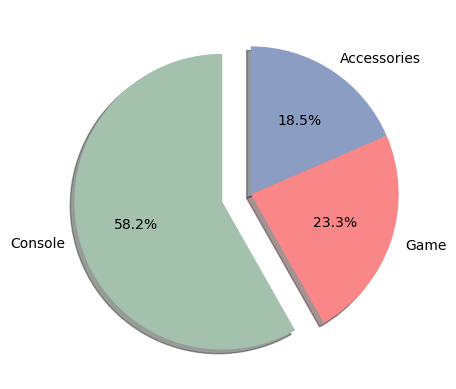

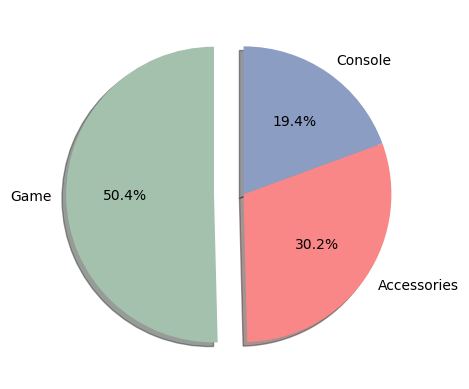

In [25]:
pie_colors = ('#a3c1ad','#f98787','#8b9dc3')
#revenue graph
plt.pie(categories_revenue.values, labels=categories_revenue.index, autopct='%1.1f%%', startangle=90, colors=pie_colors, shadow=True, explode = [0.2,0,0])
plt.show()

#units sold graph
plt.pie(categories_units.values, labels=categories_units.index, autopct='%1.1f%%', startangle=90, colors=pie_colors, shadow=True, explode = [0.2,0,0])
plt.show()

## 3. Find the distribution of customers and the number of purchases they make.

In [14]:
#dataframe
customer_purchases = t.groupby('customer_id')['trans_id'].count()
print(customer_purchases)

customer_id
1      4
2      2
3      3
4      1
5      1
      ..
860    1
861    3
862    1
863    1
864    1
Name: trans_id, Length: 708, dtype: int64


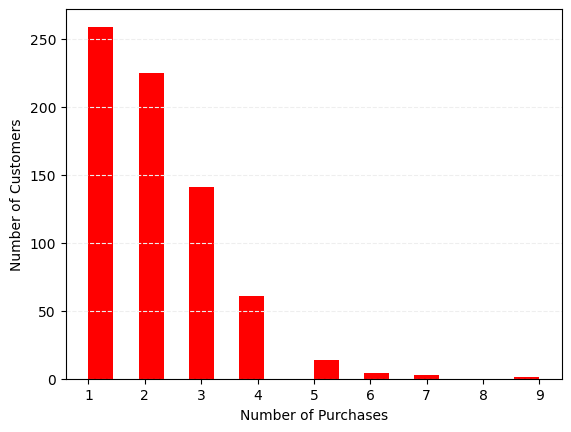

In [15]:
#graph
plt.hist(customer_purchases, bins=18, color='red')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
#plt.title('Distribution of Customer Purchases')

plt.grid(axis='y', color='#eeeeee', linestyle='--')
plt.show()

plt.show()

## 4. Find the Top 5 Selling products in the store

In [36]:
# dataframe
top_five = join_t_p.groupby('name')['trans_id'].count()
top_five = top_five.sort_values(ascending=False)
top_five = top_five.head()

print(top_five)

name
Metal Gear Solid HD Collection             26
The Legend of Zelda: A Link to the Past    18
Super Mario 64                             17
Sonic & Knuckles                           16
Pokemon Ruby                               14
Name: trans_id, dtype: int64


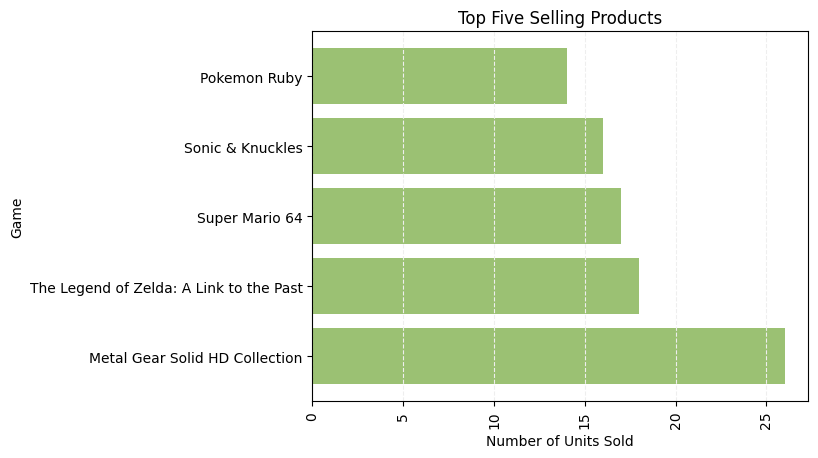

In [37]:
#graph
plt.barh(top_five.index, top_five.values, color='#9bc173')
plt.xlabel('Number of Units Sold')
plt.ylabel('Game')
plt.title('Top Five Selling Products')

plt.grid(axis = 'x', color='#eeeeee', linestyle='--')
plt.xticks(rotation=90)
plt.show()

## 5. Find the Number of total revenue earned for each genre of video games.

In [73]:
#dataframe
join_t_g = pd.merge(t,g, on='product_id', how='left')
join_t_g = join_t_g.dropna() #drops all accessories and consoles so there's only games

game_revenue = join_t_g.groupby('genre')['price'].sum()
game_revenue = game_revenue.sort_values()
print(game_revenue)

genre
Maze                                   60.0
Fighting/Party                         70.0
Run and gun                           132.0
Puzzle                                135.0
Shooter                               140.0
Strategy role-playing game (SRPG)     210.0
Simulation                            240.0
Action, Simulation                    245.0
First-person shooter                  250.0
Racing                                275.0
Rail shooter                          275.0
Space simulation                      280.0
Shoot 'em up                          306.0
Strategy                              400.0
Space combat simulation               400.0
Action                                590.0
Action role-playing game (ARPG)       610.0
Sports                                715.0
Fighting                              782.0
Kart racing                           885.0
Beat 'em up                           920.0
Survival horror                      1190.0
Stealth action            

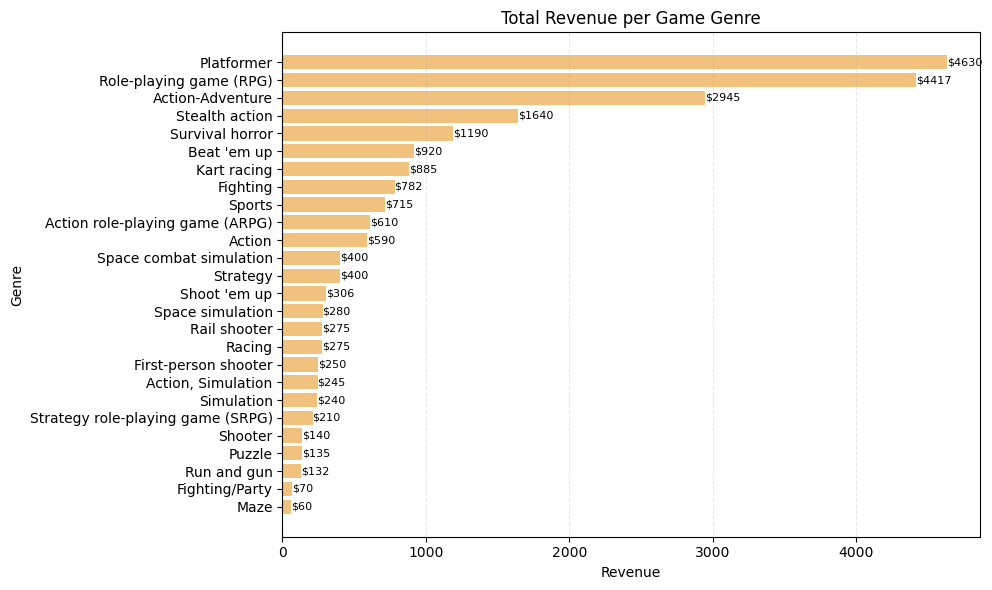

In [93]:
plt.figure(figsize=(10, 6))
plt.barh(game_revenue.index, game_revenue.values, color='#f1c27d')

for genre, revenue in game_revenue.items():
    plt.text(revenue, genre, f"${revenue:.0f}", ha='left', va='center', fontsize=8, color='black')

plt.xlabel('Revenue')
plt.ylabel('Genre')
plt.title('Total Revenue per Game Genre')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()